In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import risk_kit as rk

ind = erk.get_ind_returns()
er = rk.annualize_rets(ind["1996":"2000"], 12)
cov = ind["1996":"2000"].cov()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Given a risk free rate , we wish to find the weights that will maximize the sharpe ratio - another optimization problem

(0.0, 0.14178366251002647)

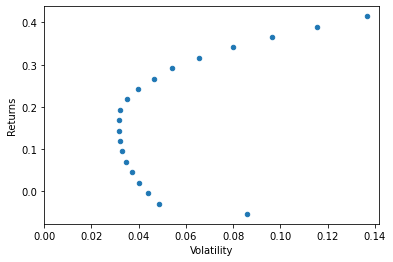

In [10]:
# return weights for max sharpe ratio for given risk free rate

from scipy.optimize import minimize

def msr(risk_free_rate,er,cov):
    n = er.shape[0]
    init_guess = np.repeat(1/n,n)
    bounds = ((0.0,1.0),)*n
    # construct the contraints
    weight_sum_to_1 = {
        "type":"eq",
        "fun" : lambda weights: np.sum(weights)-1
        
    }

    def neg_sharpe(weights,risk_free_rate,er,cov):
        """
        return negative of sharpe ratio (since we have access to min funciton and we 
        must maximize the sharpe ratio)
        """
        r = rk.portfolio_return(weights,er)
        v = rk.portfolio_vol(weights,cov)
        return -(r-risk_free_rate)/v
    
    weights = minimize(neg_sharpe,init_guess,bounds = bounds,
                       args = (risk_free_rate,er,cov),
                       method = "SLSQP",
                       options = {"disp":False},
                      constraints = (weight_sum_to_1,),)
    return weights.x

# plot EF
ax = rk.plot_ef(20, er, cov)
ax.set_xlim(left = 0)

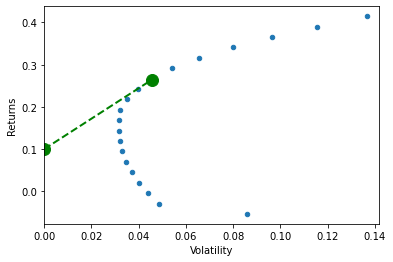

In [14]:
ax = rk.plot_ef(20, er, cov)
ax.set_xlim(left = 0)

# get msr for given portfolio
rf = 0.1
w_msr = rk.msr(rf, er, cov)
r_msr = rk.portfolio_return(w_msr, er)
vol_msr = rk.portfolio_vol(w_msr, cov)
r_msr
cml_x = [0, vol_msr]
cml_y = [rf, r_msr]
ax.plot(cml_x, cml_y, color='green', marker='o', linestyle='dashed', linewidth=2, markersize=12)

<AxesSubplot:xlabel='Volatility'>

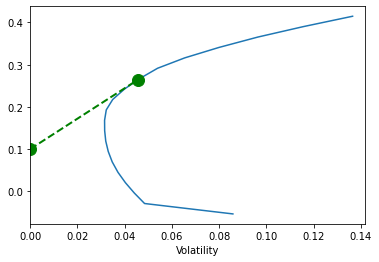

In [32]:
rk.plot_ef(20, er, cov, style='-', show_cml=True, riskfree_rate=0.1)